# BRSM - PCA Assignment
### Srujana Vanka - 2020102005

In [1]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing CSV file 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

## 1 Wine dataset

In [15]:
# Load dataset
wine_data = pd.read_excel("/home/sruj/Downloads/wine.xlsx", sheet_name="in")
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 2 Principal Component Analysis

### 1. Generate a correlation heatmap for all the features in the dataset.

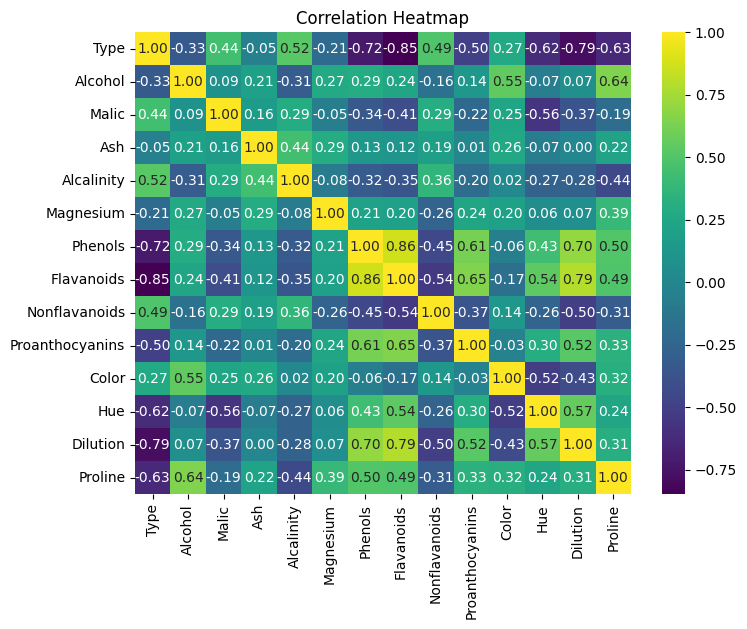

In [16]:
corr_matrix = wine_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Observations from the Correlation Heatmap

**Diagonal Elements**:
- The diagonal elements are all 1 (yellow color) because they represent the correlation of each feature with itself, which is always perfect positive correlation.

**Off-Diagonal Elements**:
- Darker shades (towards yellow) indicate stronger positive correlations.
- Lighter shades (towards green) indicate weaker positive correlations.
- Negative correlations are represented by shades of purple, with darker shades indicating stronger negative correlations.
- Correlation values close to 0 are represented by shades of green, indicating weak or no linear relationship between the features.

#### Interpretation:
- Most elements have a correlation value of around 0.25 (light green), suggesting weak positive linear relationships between these features.
- Understanding which features are positively correlated and which ones are not can provide insights into how they might influence each other or affect the target variable.

The correlation heatmap provides a visual summary of the correlations between different features in the dataset, helping to identify patterns and relationships that may be useful for further analysis.


### 2. Perform parallel analysis on the wine dataset.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaled_wine_data = StandardScaler().fit_transform(wine_data)

# PCA
pca = PCA()
pca.fit(scaled_wine_data)
explained_variance = pca.explained_variance_
random_data = np.random.normal(size=scaled_wine_data.shape)
pca_random = PCA()
pca_random.fit(random_data)
explained_variance_random = pca_random.explained_variance_

# Calculate the 95th percentile of eigenvalues from random data
percentile_95 = np.percentile(explained_variance_random, 95)

# Determine the number of components to retain using parallel analysis
num_components_parallel = np.sum(explained_variance > percentile_95)

print("Number of components to retain based on Parallel Analysis:", num_components_parallel)


Number of components to retain based on Parallel Analysis: 3


In [20]:
# Determine the number of components to retain using the proportion of variance explained criterion
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components_variance_95 = np.argmax(explained_variance_ratio >= 0.95) + 1  # Retain components explaining 90% of variance

print("Number of components to retain based on Proportion of Variance Explained (>= 95%):", num_components_variance_95)

Number of components to retain based on Proportion of Variance Explained (>= 95%): 10


#### Observations and Inferences:

- **Number of Components Recommended:**
  - *Proportion of Variance Explained Criterion:* 10 components
  - *Parallel Analysis:* 3 components

The Proportion of Variance Explained Criterion recommends retaining 10 principal components, aiming to capture at least 95% of the variance in the data. Parallel Analysis suggests retaining only 3 principal components based on the comparison of observed eigenvalues with those obtained from random data.

**Observations:**
  - **Proportion of Variance Explained Criterion:** Recommends retaining a larger number of components to capture a higher percentage of the data's variance. This approach aims for a comprehensive representation of the dataset.
  - **Parallel Analysis:** Suggests a more conservative approach, recommending fewer components to capture variance that exceeds what would be expected by chance alone. This method prioritizes essential components that significantly contribute to the variance.

**Inferences:**
  - **Trade-off between Conservatism and Comprehensiveness:** The discrepancy between the recommendations highlights a trade-off between conservatism and comprehensiveness in dimensionality reduction.
  - **Interpretability vs. Complexity:** Fewer components recommended by parallel analysis may lead to a simpler model but might sacrifice some information. Conversely, a larger number of components recommended by the proportion of variance explained criterion may offer a more comprehensive representation but could be more challenging to interpret.
  - **Consideration of Research Objectives:** The choice of the appropriate method for determining the number of principal components to retain depends on the research objectives and the balance between model complexity and interpretability.

**Results:**
  - **Proportion of Variance Explained Criterion:** Recommends retaining 10 principal components to capture at least 95% of the variance.
  - **Parallel Analysis:** Suggests retaining only 3 principal components based on the comparison of observed eigenvalues with those obtained from random data.

The disparity in recommendations underscores the importance of understanding the underlying assumptions and trade-offs of each method.


### 3. Perform PCA and report the proportion of variance explained by the first three principal components

In [21]:
pca = PCA(n_components=3)  # considering the first three principal components
pca.fit(scaled_wine_data)

# Proportion of variance explained by the first three principal components
explained_variance_ratio = pca.explained_variance_ratio_
print("Proportion of variance explained by the first three principal components:", explained_variance_ratio)

Proportion of variance explained by the first three principal components: [0.39542486 0.17836259 0.10329102]


**Proportion of Variance Explained by the First Three Principal Components:**  
Performing PCA on the wine dataset reveals that the first three principal components explain a significant proportion of the total variance in the data:

- The first principal component explains approximately 39.54% of the variance.
- The second principal component explains around 17.84% of the variance.
- The third principal component explains about 10.33% of the variance.

#### Inferences:
1. **Dimensionality Reduction:** The fact that the first three principal components capture a substantial proportion of the variance suggests that the original dataset may have high dimensionality.
2. **Significant Variability:** These principal components represent dimensions in the data that exhibit significant variability, indicating that they may correspond to important underlying features or patterns.
3. **Interpretation:** The principal components may correspond to meaningful chemical properties or characteristics of the wines in the dataset, such as acidity, alcohol content, or flavor profiles.
4. **Potential for Simplification:** By retaining only the first three principal components, it may be possible to simplify the dataset while still capturing a large portion of its variability. This could facilitate easier analysis and interpretation of the data.

Overall, the high proportion of variance explained by the first three principal components suggests that they are crucial for understanding the variability and structure of the dataset, highlighting their importance in further analysis and modeling.


### 4. Create a scatter plot of the first two principal components

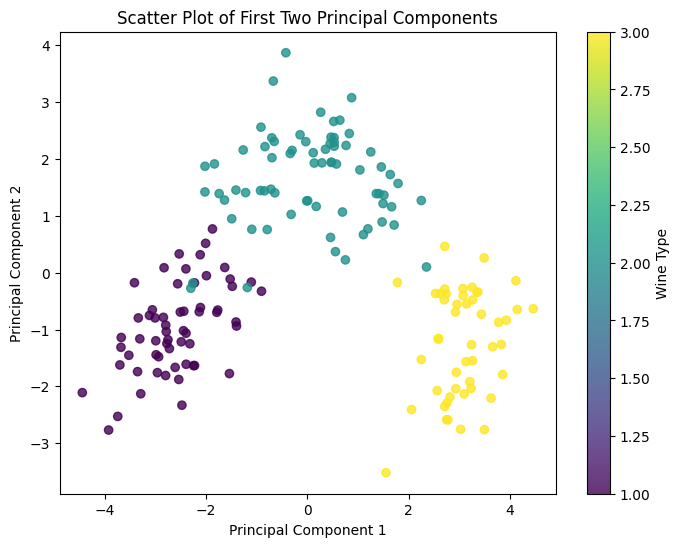

In [94]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_wine_data)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=wine_data['Type'], cmap='viridis', alpha=0.8)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Type')
plt.show()


#### Inferences and Observations
- The scatter plot displays the first two principal components (PC1 and PC2) of the wine dataset.
- Each point in the plot represents a wine sample, with the x-coordinate corresponding to PC1 and the y-coordinate corresponding to PC2.
- Wine types are distinguished by color, with different colors representing different wine types.
- The scatter plot reveals some separation between wine types, but there is a very slight overlap.
- It suggests that the first two principal components are effective at separating the wine types based on their chemical properties.


## 3 Chi-Square Test - Goodness of Fit

### 1. Formulate the null and alternative hypotheses for the Chi-Square Goodness of Fit Test in the context of this study.

#### Null Hypothesis ($H_0$):
The null hypothesis states that there is no significant difference between the observed distribution of wine types and the expected distribution, where each type of wine is equally represented in the dataset. In other words, it proposes that the observed distribution of wine types matches the expected distribution.

Mathematically, the null hypothesis can be represented as:
$$ H_0: \text{The observed distribution of wine types does not significantly deviate from an equal distribution among the three types.} $$

#### Alternative Hypothesis ($H_a$):
The alternative hypothesis contradicts the null hypothesis and suggests that there is a significant difference between the observed distribution of wine types and the expected distribution. Specifically, it proposes that the observed distribution significantly deviates from an equal distribution among the three types.

Mathematically, the alternative hypothesis can be represented as:
$$ H_a: \text{The observed distribution of wine types significantly deviates from an equal distribution among the three types.} $$

#### In summary:

- Null Hypothesis ($H_0$): The observed distribution of wine types does not significantly deviate from an equal distribution among the three types.
- Alternative Hypothesis ($H_a$): The observed distribution of wine types significantly deviates from an equal distribution among the three types.

These hypotheses will guide in conducting the Chi-Square Goodness of Fit Test to determine whether the observed distribution of wine types differs significantly from the expected distribution.


### 2 Calculate the chi-square statistic and the corresponding p-value.

In [95]:
import numpy as np
from scipy.stats import chi2

observed_freq = np.array([59, 71, 48])

# Total number of observations
total_obs = np.sum(observed_freq)
num_categories = len(observed_freq)

# Expected frequency under null hypothesis (equal distribution)
expected_freq = np.full_like(observed_freq, fill_value=total_obs / num_categories)

# Chi-square statistic
chi_squared = np.sum((observed_freq - expected_freq)**2 / expected_freq)

# Degrees of freedom
df = num_categories - 1

# Calculate p-value
p_value = 1 - chi2.cdf(chi_squared, df)

print("Chi-Square Statistic:", chi_squared)
print("Degrees of Freedom:", df)
print("P-value:", p_value)


Chi-Square Statistic: 4.491525423728813
Degrees of Freedom: 2
P-value: 0.10584677898448502


### 3. Interpret the results of the Chi-Square Goodness of Fit Test.

In [11]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The observed distribution significantly differs from an equal distribution.")
else:
    print("Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.")

Fail to reject the null hypothesis. The observed distribution does not significantly differ from an equal distribution.


### Interpretation of Chi-Square Goodness of Fit Test Results

#### Null and Alternative Hypotheses:
- **Null Hypothesis ($H_0$)**: The observed distribution of wine types does not significantly differ from an equal distribution amongst the three types.
- **Alternative Hypothesis ($H_a$)**: The observed distribution of wine types significantly differs from an equal distribution amongst the three types.
  
#### Test Summary
- **Chi-Square Statistic:** 4.49
- **P-value:** 0.106
- **Conclusion:** Fail to reject the null hypothesis.

#### Interpretation
Based on the Chi-Square Goodness of Fit Test, the observed distribution of wine types does not significantly differ from an equal distribution amongst the three types at a significance level of 0.05. The calculated p-value (0.106) is greater than the significance level. Therefore, we fail to reject the null hypothesis, suggesting that there is insufficient evidence to conclude that the observed distribution significantly deviates from an equal distribution among the wine types. 

This indicates that the distribution of wine types in the dataset is consistent with an expected distribution where each type of wine is equally represented.



## 4 Chi-Square Test - Independence

### 1 Categorize the ‘Alcohol’ content into three levels: ‘Low’, ‘Medium’, and ‘High’, based on percentile divisions

In [9]:
wine_data['Alcohol_Category'] = pd.qcut(wine_data['Alcohol'], q=[0, 1/3, 2/3, 1], labels=['Low', 'Medium', 'High'])
wine_data[['Alcohol', 'Alcohol_Category']].head()

,Alcohol,Alcohol_Category
0,14.23,High
1,13.20,Medium
2,13.16,Medium
3,14.37,High
4,13.24,Medium


In [10]:
contingency_table = pd.crosstab(wine_data['Type'], wine_data['Alcohol Category'])

print("Contingency Table (Cross-Tabulation) of Type and Alcohol Category:")
contingency_table


Contingency Table (Cross-Tabulation) of Type and Alcohol Category:


Alcohol Category,Low,Medium,High
Type,,,
1,0,17,42
2,54,14,3
3,6,28,14


### 2. Create a contingency table (cross-tabulation) showing the frequencies of each combination of ‘Type’ and ‘Alcohol Category’ .

### 3. Formulate and state the null and alternate hypothteses.

#### Null Hypothesis ($H_0$):
The null hypothesis states that there is no association between the type of wine and the alcohol category. In other words, the distribution of wine types is independent of the alcohol category.

Mathematically, the null hypothesis can be represented as:
$$ H_0: \text{The type of wine is independent of the alcohol category.} $$

#### Alternative Hypothesis ($H_a$):
The alternative hypothesis contradicts the null hypothesis and suggests that there is an association between the type of wine and the alcohol category. In other words, the distribution of wine types is not independent of the alcohol category.

Mathematically, the alternative hypothesis can be represented as:
$$ H_a: \text{The type of wine is not independent of the alcohol category.} $$

#### In summary:

- **Null Hypothesis ($H_0$)**: The type of wine is independent of the alcohol category.
- **Alternative Hypothesis ($H_a$)**: The type of wine is not independent of the alcohol category.


### 4. Perform the Chi-Squared Test for Independence using the contingency table. Calculate the chi-square statistic, degrees of freedom, and the corresponding p-value.

In [11]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_val)


Chi-Square Statistic: 121.35381180600793
Degrees of Freedom: 4
p-value: 2.744588037113176e-25


### 5. Interpret the results of the Chi-Squared Test for Independence. Discuss whether the null hypothesis can be rejected based on the p-value and a significance level (α) of 0.05.

In [12]:
# Significance level 
alpha = 0.05

if p_val < alpha:
    print("The p-value ({:.4f}) is less than the significance level (α = 0.05).".format(p_val))
    print("Therefore, we reject the null hypothesis.")
    print("There is sufficient evidence to conclude that the type of wine is not independent of the alcohol category.")
else:
    print("The p-value ({:.4f}) is greater than or equal to the significance level (α = 0.05).".format(p_val))
    print("Therefore, we fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the type of wine is not independent of the alcohol category.")


The p-value (0.0000) is less than the significance level (α = 0.05).
Therefore, we reject the null hypothesis.
There is sufficient evidence to conclude that the type of wine is not independent of the alcohol category.


### Interpretation of the Chi-Squared Test for Independence

#### Results:
- **Chi-Square Statistic**: 121.3539
- **Degrees of Freedom**: 4
- **p-value**: 2.74459e-25(approximately 0.0000)

#### Interpretation:
- **p-value Analysis**: The p-value (approximately 0.0000) is less than the significance level (α = 0.05). This indicates that there is sufficient evidence to reject the null hypothesis.
- **Conclusion**: Therefore, we reject the null hypothesis. There is sufficient evidence to conclude that the type of wine is not independent of the alcohol category. 

The large chi-square statistic (121.3539) suggests a significant difference between the observed and expected frequencies, further supporting the rejection of the null hypothesis. With a very low p-value, we can confidently conclude that there is a significant association between the type of wine and the alcohol category.
